<a href="https://colab.research.google.com/github/nikunjsonule/hotel-booking-analysis/blob/main/Nikunj_Sonule_(Self_Analysis)_Hotel_Booking_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
!pip install pycountry

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pycountry as pc
import matplotlib.ticker as mtick
import plotly.express as px


     |████████████████████████████████| 10.1 MB 4.3 MB/s 
  Created wheel for pycountry: filename=pycountry-20.7.3-py2.py3-none-any.whl size=10746883 sha256=44663b08ff2a59e252fe5c5d61b6102175cfaabc7e04a7df98987dca840283a9
  Stored in directory: /root/.cache/pip/wheels/57/e8/3f/120ccc1ff7541c108bc5d656e2a14c39da0d824653b62284c6
Successfully built pycountry


In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
# importing dataset from drive
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/All project/EDA/Hotel Booking Analysis/Hotel Bookings.csv")

In [7]:
# First 5 rows of datasets
data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [8]:
# Using this data frame for all analysis
hotel_data_copy= data.copy()
hotel_data_copy.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [23]:
#Find out the data type of each column 
hotel_data_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 29 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  meal                            119390 non-null  object 
 11  country                         118902 non-null  object 
 12  market_segment  

In [26]:
hotel_data_copy.shape

(119390, 29)

In [27]:
# drop duplicate values in data frame
hotel_data_copy = hotel_data_copy.drop_duplicates()

In [28]:
# Droping null values from the dataset
hotel_data_copy.dropna(inplace=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [29]:
# So after cleaning our datasets we have 86913 columns and 29 rows
hotel_data_copy.shape

(86913, 29)

# General Analysis

How much does guest pay for a room per night ?

In [30]:
#creating new dataframe so we can do our anlaysis non cancelled room only

room_type_category = hotel_data_copy[hotel_data_copy['is_canceled']==0]

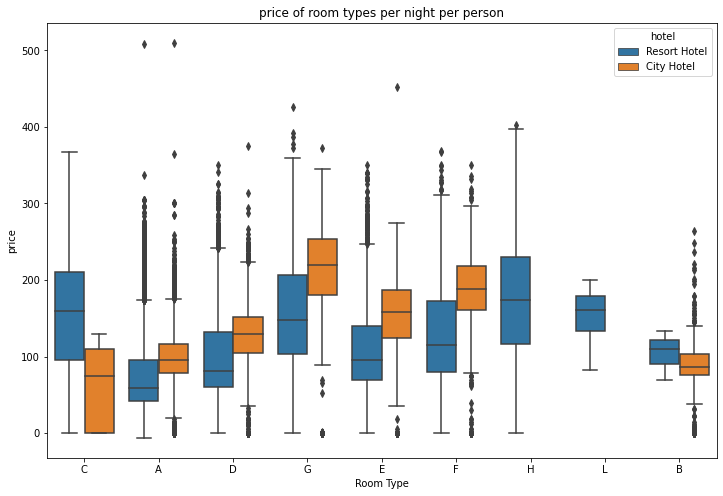

In [31]:
#ploting box plot fro analysis

plt.figure(figsize=(12,8))
sns.boxplot(x='reserved_room_type', y ='adr',data = room_type_category,hue='hotel')
plt.title('price of room types per night per person')
plt.xlabel('Room Type')
plt.ylabel('price')
plt.show()

We can see in the above figure that with repect to "A" category room it has highest price appox as outlier

whereas with respect to 'G' category room of city hotel are much costlier than other

Which are the most busy month ?

Text(0.5, 1.0, 'Graph showing number of arrival per month')

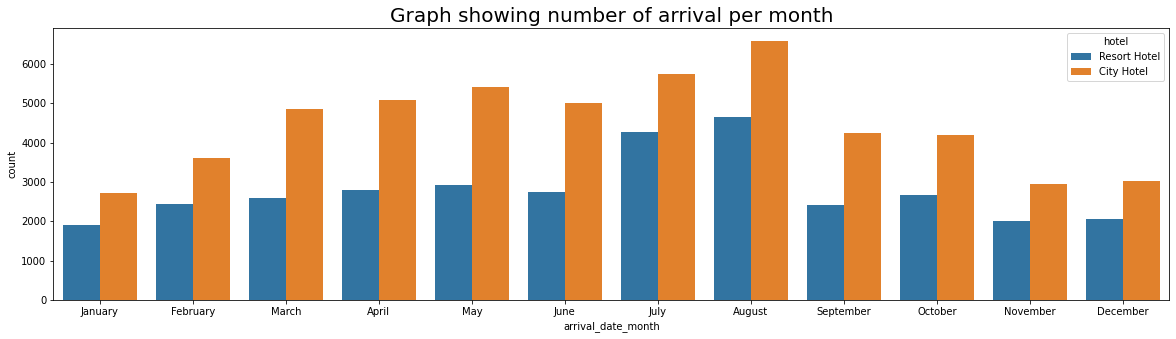

In [32]:
plt.figure(figsize=(20,5))

sns.countplot(data = hotel_data_copy, x = 'arrival_date_month', hue = 'hotel', order = ['January', 'February', 'March', 'April', 'May', 'June', 'July',
          'August', 'September', 'October', 'November', 'December']).set_title('Graph showing number of arrival per month',fontsize=20)

Which meals were most preferrable to the customer ?

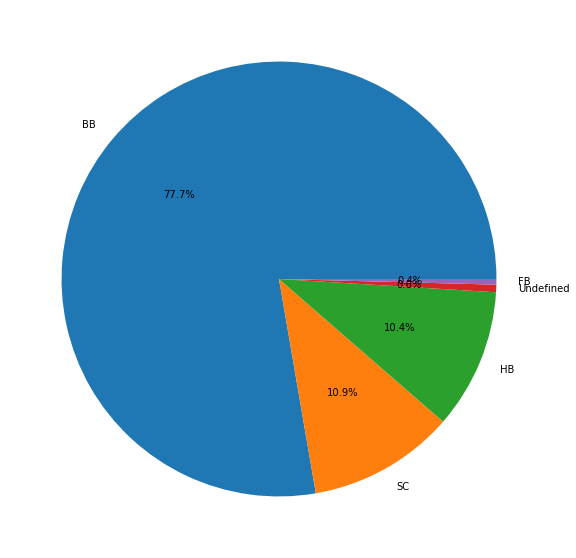

In [33]:
# Enlarging the pie chart
plt.rcParams['figure.figsize'] = 10,10

#Making list of  not cancelled
# Assigning labels and converting them to list 

labels = hotel_data_copy['meal'].value_counts().index

# Assigning sizes and converting to list

sizes = hotel_data_copy['meal'].value_counts().tolist()

# Autopct enables you to display the percent value using python string formatting. .1f% will round off to the tenth place
plt.pie(sizes,labels=labels,autopct='%0.1f%%')
plt.show()

How long does guest stay at hotel on weekends and weekdays ?

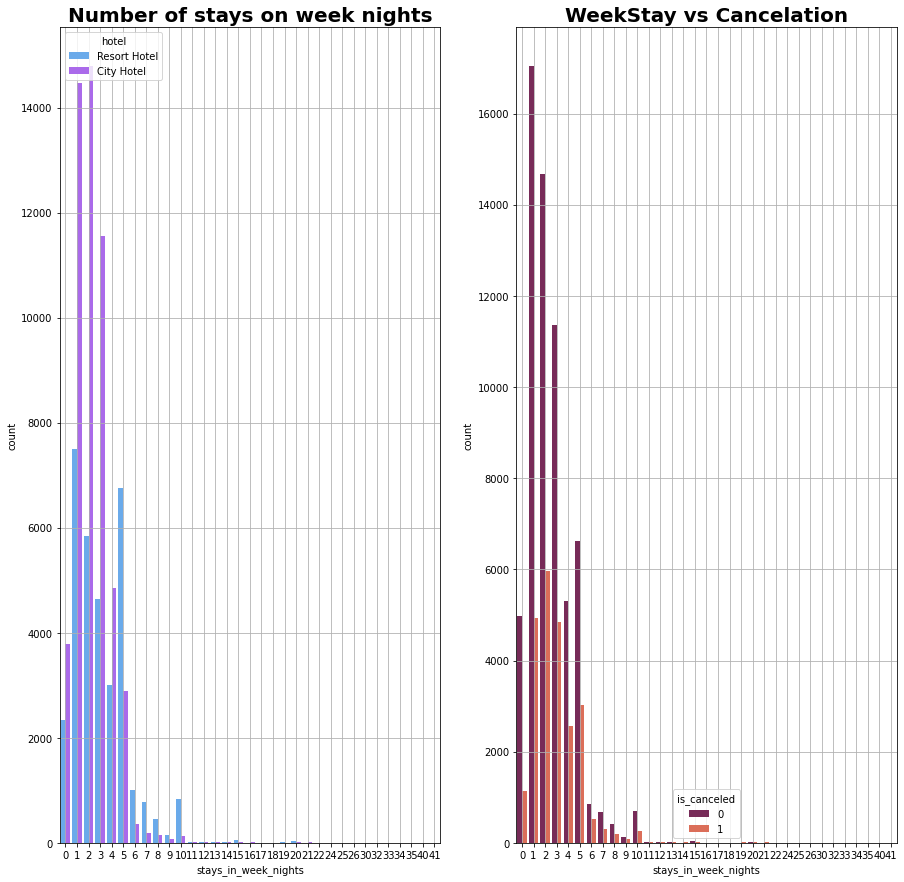

In [34]:
plt.figure(figsize=(15, 15))
plt.subplot(1, 2, 1)
sns.countplot(data = hotel_data_copy, x = 'stays_in_week_nights',hue='hotel' ,palette='cool')
plt.title("Number of stays on week nights",fontweight="bold", size=20)
plt.grid()

plt.subplot(1, 2, 2)
sns.countplot(data = hotel_data_copy, x = 'stays_in_week_nights', hue='is_canceled', palette='rocket')
plt.title('WeekStay vs Cancelation',fontweight="bold", size=20)
plt.grid()

plt.show()

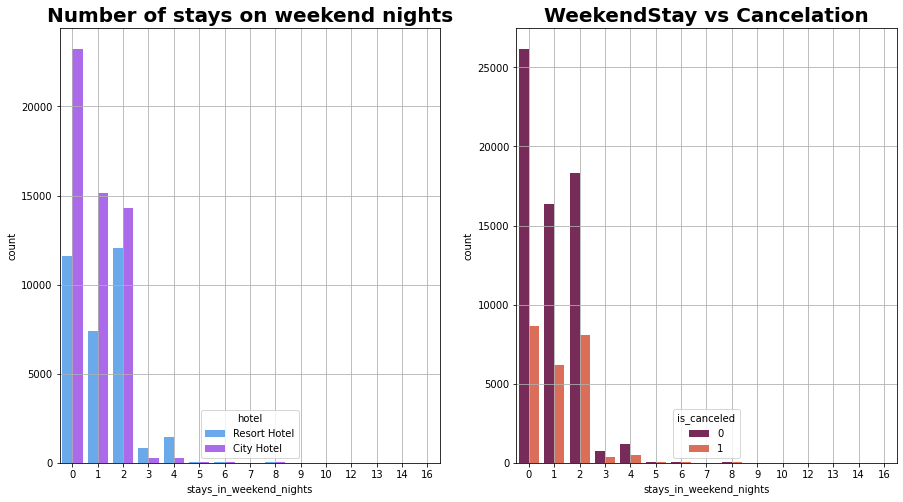

In [35]:
plt.figure(figsize=(15, 8))
plt.subplot(1, 2, 1)
sns.countplot(data = hotel_data_copy, x = 'stays_in_weekend_nights',hue='hotel' ,palette='cool')
plt.title("Number of stays on weekend nights",fontweight="bold", size=20)
plt.grid()

plt.subplot(1, 2, 2)
sns.countplot(data = hotel_data_copy, x = 'stays_in_weekend_nights', hue='is_canceled', palette='rocket')
plt.title('WeekendStay vs Cancelation',fontweight="bold", size=20)
plt.grid()

plt.show()

How many adults and childs guests arrived per month in each hotels?

In [36]:
#Total bookings
total_bookings = hotel_data_copy.groupby(['hotel','arrival_date_month'])['adults','childs'].sum().reset_index()
total_bookings

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



,hotel,arrival_date_month,adults,childs
0,City Hotel,April,9805,785.0
1,City Hotel,August,13188,1532.0
2,City Hotel,December,5688,522.0
3,City Hotel,February,6576,518.0
4,City Hotel,January,4801,333.0
5,City Hotel,July,11535,1201.0
6,City Hotel,June,9447,575.0
7,City Hotel,March,8989,462.0
8,City Hotel,May,9993,493.0
9,City Hotel,November,4999,182.0


In [37]:
# Only Resort bookings
resort = total_bookings.loc[(total_bookings["hotel"] == "Resort Hotel")]
# Sort arrival date month column by month wise
resort['arrival_date_month'] = pd.Categorical(resort['arrival_date_month'], ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])
resort.sort_values(by = 'arrival_date_month',inplace=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [38]:
print(resort['adults'].max())
print(resort['childs'].max())

9463
1400.0


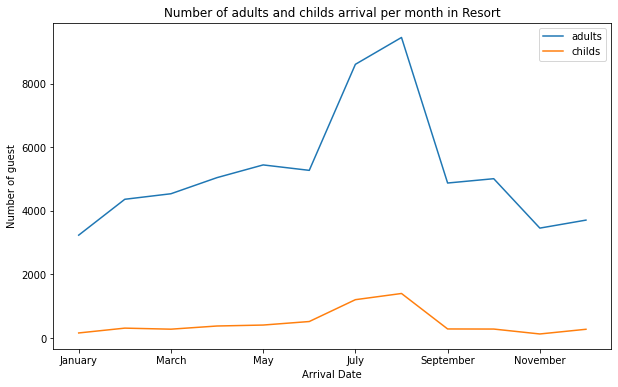

In [39]:
#Line plot for finding the number of adults and kids -Resort hotel
resort.plot(x = 'arrival_date_month',y= ['adults','childs'],figsize=(10, 6), title = 'Number of adults and childs arrival per month in Resort', xlabel = 'Arrival Date', ylabel = 'Number of guest');

# Business Perspective 

Which is the most preferred business segment ?

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



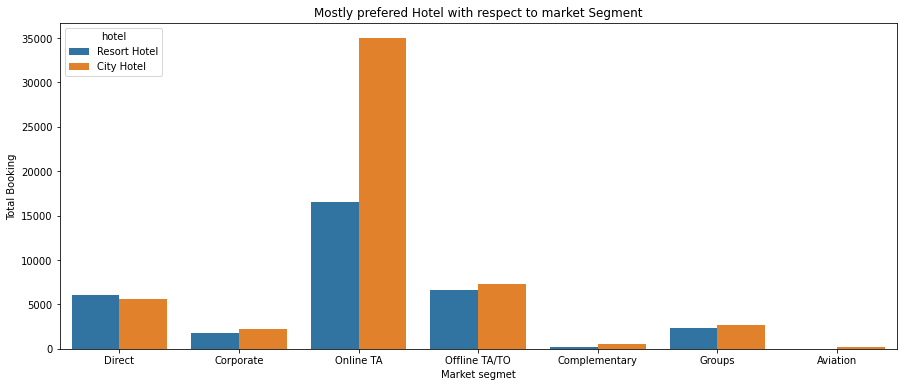

In [40]:
# This is a Count plot for finding most prefered market segment 
fig_dims = (15, 6)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot(hotel_data_copy.market_segment,hue= hotel_data_copy.hotel,ax=ax).set(title = 'Mostly prefered Hotel with respect to market Segment', xlabel = 'Market segmet' , ylabel ='Total Booking');




*   Online TA , has most no. of hotel Bookings, where they Mostly prefer City Hotel over Resort Hotel. (i.e booking done for City Hotel is almost 35000 & for Resort hotel it is almost half i.e 16000 bookings)

* Followed by Offline TA/TO Where they also slightly prefer city Hotel more than Resort Hotel.
* Then Comes in line the Direct Market Segment and they prefer Resort hotel than City hotel.
* Later inline we have Groups, Corporate And Complementary Market Segments where they all slightly prefer city hotel over resort hotel.
* Last in the line we have Aviation market segment where they only prefer city Hotel.

In [41]:
# Total booking done by Online TA
hotel_data_copy.loc[hotel_data_copy['market_segment']=='Online TA'].hotel.value_counts()

City Hotel      34984
Resort Hotel    16549
Name: hotel, dtype: int64